In [ ]:
import pandas as pd

df = pd.read_csv('cagr_merge.csv')

In [ ]:
# ROE 3 이상인 이상치 데이터 해당 값을 제외한 나머지 값 평균으로 평탄화.
#hj중공업
df.loc[(df.index == 5195), 'ROE'] = -0.23384595713555179
#이엠앤아이
df.loc[(df.index == 4844), 'ROE'] =-0.26219353673500395
df.loc[(df.index == 4845), 'ROE'] = -0.26219353673500395
#보해양조 ROE값 대체
df.loc[(df.index == 221), 'ROE'] =df[df['거래소코드']==890]['ROE'][1:].mean()
#동양 ROE값 대체
df.loc[(df['거래소코드'] == 1520) & (df.index == 369), 'ROE'] = -0.0960458
df.loc[(df['거래소코드'] == 1520) & (df.index == 368), 'ROE'] = -0.0960458
df.loc[(df['거래소코드'] == 1520) & (df.index == 367), 'ROE'] = -0.0960458
#기억안남 ㅋ
df.loc[(df.index == 881), 'ROE'] = -0.11928771255776867
df.loc[(df.index == 882), 'ROE'] = -0.11928771255776867
#기억안남 ㅋ
df.loc[(df.index == 2018), 'ROE'] = -0.35633446493456955
df.loc[(df.index == 2021), 'ROE'] = -0.35633446493456955
df.loc[(df.index == 2022), 'ROE'] = -0.35633446493456955
#에스지엔지 ROIC 이상치 수정
df.loc[(df.index == 3626), 'ROIC'] =0.12868591275883903

#opex/매출
df[df['OPEX/매출']<0] #이거 기존에 나갔던 대손상각비가 +된 값임.
df.loc[(df.index == 3687), 'ROIC'] =42660
#좋은건데, 그냥 보수적으로 보기 위해 0으로 수정.


#roce 너무 높은경우 0으로 처리하기
roce_index=df[df['ROCE']>2]['ROCE'].index
for i in roce_index:
    df.loc[(df.index == i), 'ROCE'] =0

In [ ]:
df = df.drop(['자산총계','자사주매입2','주주환원2','주주환원1','재무레버리지', '신용스프레드','자기자본 비율'], axis=1)
df['Buffett']= df['Buffett'].astype(str)
df['부채비율']=df['부채비율']/100
df['train_cagr(%)']=df['train_cagr(%)']/100
df['test_cagr(%)']=df['test_cagr(%)']/100
df['CAGR_tr(%)']=df['CAGR_tr(%)']/10000

df.drop('증권명',axis=1,inplace=True)

In [ ]:
df.to_csv('feature_전처리_전().csv', index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
data = pd.read_csv('feature_전처리_전().csv')

In [ ]:
data['보통주식비율'] = data['보통주식비율']/100

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 특정 feature에 대한 통계 정보 계산하고 동시에 데이터 스케일링
data[['잉여현금흐름', 'Buffett','부채비율','유동비율']] = scaler.fit_transform(data[['잉여현금흐름', 'Buffett','부채비율','유동비율']])

In [ ]:
data.describe()

,거래소코드,ROE,ROIC,OPEX/매출,잉여현금흐름,Buffett,ROCE,자사주매입1,배당율,보통주식비율,연도,부채비율,당좌비율,유동비율,train_cagr(%),test_cagr(%),CAGR_tr(%)
count,5473.000000,5473.000000,5473.000000,5473.000000,5.473000e+03,5.473000e+03,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5.473000e+03,5473.000000,5.473000e+03,5473.000000,5473.000000,5473.000000
mean,37938.503563,0.014001,7.844487,0.170310,-5.193077e-18,5.193077e-18,-0.247040,0.084527,0.002225,0.411393,2016.000000,6.491346e-18,0.275311,-3.115846e-17,0.050676,-0.024615,0.091317
std,67453.110688,0.485181,576.643845,0.177905,1.000091e+00,1.000091e+00,4.736085,2.604437,0.044138,0.154993,3.741999,1.000091e+00,0.420153,1.000091e+00,0.118338,0.134060,0.052842
min,40.000000,-21.950710,-4.267592,-0.028324,-1.477717e+01,-5.515979e+00,-262.151598,-54.459227,-1.746361,0.000000,2010.000000,-2.012554e+00,0.000229,-9.928571e-01,-0.421385,-0.365709,-0.070094
25%,6120.000000,0.000130,0.000404,0.076945,-6.127656e-02,-8.407421e-02,-0.102160,0.000000,0.000000,0.306900,2013.000000,-8.222582e-02,0.073238,-4.959182e-01,-0.019967,-0.103771,0.079735
50%,25320.000000,0.051612,0.041757,0.114611,-4.776048e-02,-7.401768e-02,0.060727,0.000000,0.000000,0.410800,2016.000000,-4.604620e-02,0.148954,-3.195536e-01,0.052347,-0.041187,0.103334
75%,52710.000000,0.106783,0.098894,0.189098,-2.892783e-02,-5.565558e-02,0.209237,0.000000,0.000000,0.508700,2019.000000,2.215429e-03,0.313260,1.109980e-01,0.128089,0.034493,0.116901
max,900140.000000,1.905029,42660.000000,3.698292,3.396914e+01,3.399735e+01,1.964603,140.573132,1.287013,0.907900,2022.000000,6.622630e+01,8.574163,1.585499e+01,0.351884,0.689699,0.153109


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

data[['배당율','ROE', 'ROIC','OPEX/매출','유동비율','잉여현금흐름','Buffett','ROCE','자사주매입1','부채비율','당좌비율','유동비율']] = sc.fit_transform(data[['배당율','ROE', 'ROIC','OPEX/매출','유동비율','잉여현금흐름','Buffett','ROCE','자사주매입1','부채비율','당좌비율','유동비율']])


In [ ]:
data.describe()

,거래소코드,ROE,ROIC,OPEX/매출,잉여현금흐름,Buffett,ROCE,자사주매입1,배당율,보통주식비율,연도,부채비율,당좌비율,유동비율,train_cagr(%),test_cagr(%),CAGR_tr(%)
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,37938.503563,0.920731,0.000284,0.053302,0.303144,0.139598,0.991626,0.279665,0.576449,0.411393,2016.000000,0.029493,0.032083,0.058931,0.050676,-0.024615,0.091317
std,67453.110688,0.020338,0.013516,0.047739,0.020516,0.025310,0.017932,0.013354,0.014551,0.154993,3.741999,0.014656,0.049003,0.059360,0.118338,0.134060,0.052842
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,0.000000,-0.421385,-0.365709,-0.070094
25%,6120.000000,0.920149,0.000100,0.028248,0.301887,0.137470,0.992175,0.279232,0.575716,0.306900,2013.000000,0.028288,0.008515,0.029496,-0.019967,-0.103771,0.079735
50%,25320.000000,0.922307,0.000101,0.038355,0.302165,0.137725,0.992792,0.279232,0.575716,0.410800,2016.000000,0.028818,0.017346,0.039964,0.052347,-0.041187,0.103334
75%,52710.000000,0.924620,0.000102,0.058343,0.302551,0.138189,0.993354,0.279232,0.575716,0.508700,2019.000000,0.029525,0.036510,0.065519,0.128089,0.034493,0.116901
max,900140.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.907900,2022.000000,1.000000,1.000000,1.000000,0.351884,0.689699,0.153109


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(data['신용등급'])
data['신용등급'] = encoder.transform(data['신용등급'])

print('인코딩 클래스:', encoder.classes_)
data['거래소코드']= data['거래소코드'].astype(str)
data['거래소코드']= data['거래소코드'].str.zfill(6)
data['회계년도'] = pd.to_datetime(data['회계년도'])
# 17년, 22년 기준으로 CAGR크면 1로 처리.


인코딩 클래스: ['A' 'A+' 'A-' 'AA' 'AA+' 'AA-' 'AAA' 'BBB' 'BBB+' 'BBB-']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   회사명            5473 non-null   object        
 1   거래소코드          5473 non-null   object        
 2   회계년도           5473 non-null   datetime64[ns]
 3   ROE            5473 non-null   float64       
 4   ROIC           5473 non-null   float64       
 5   OPEX/매출        5473 non-null   float64       
 6   잉여현금흐름         5473 non-null   float64       
 7   Buffett        5473 non-null   float64       
 8   ROCE           5473 non-null   float64       
 9   자사주매입1         5473 non-null   float64       
 10  배당율            5473 non-null   float64       
 11  보통주식비율         5473 non-null   float64       
 12  연도             5473 non-null   int64         
 13  평가사명 및 등급      5473 non-null   object        
 14  신용등급           5473 non-null   int32         
 15  부채비율           5473 n

In [ ]:
data.loc[(data['회계년도'].dt.year == 2017) & (data['train_cagr(%)'] >= 0.113292), 'label'] = 1
data.loc[(data['회계년도'].dt.year == 2022) & (data['test_cagr(%)'] >= 0.07329), 'label'] = 1

In [ ]:
#트레인,테스트 데이터셋 분리
df_tr = pd.DataFrame()
df_test = pd.DataFrame()

# 인덱스를 기준으로 8개씩 묶어서 반복
for i in range(0, len(data), 13):
    # 트레인 데이터 추출
    train_batch = data.iloc[i:i+8]
    df_tr = pd.concat([df_tr, train_batch])

    # 테스트 데이터 추출
    test_batch = data.iloc[i+8:i+13]
    df_test = pd.concat([df_test, test_batch])

df_tr['label']=df_tr['label'].fillna(0)
df_test['label']=df_test['label'].fillna(0)
existing_row = df_tr.loc[(df_tr['label'] == 1) & (df_tr['회계년도'].dt.year == 2017)]
code1=existing_row['거래소코드'].unique()

for i in code1:
    condition = df_tr['거래소코드'] == i
    df_tr.loc[condition, 'label'] = 1

#17년도 1이면 10~17 1로처리.

existing_test = df_test.loc[(df_tr['label'] == 1) & (df_test['회계년도'].dt.year == 2022)]
code2=existing_test['거래소코드'].unique()

for i in code2:
    condition = df_tr['거래소코드'] == i
    df_tr.loc[condition, 'label'] = 1


x_tr=df_tr.drop('label',axis=1)
y_tr=df_tr['label']
y_tr=y_tr.astype(int)
x_test=df_test.drop('label',axis=1)
y_test=df_test['label']

x_tr.drop(['회사명', '거래소코드', '회계년도','평가사명 및 등급','train_cagr(%)','test_cagr(%)','CAGR_tr(%)','연도'],axis=1,inplace=True)
x_test.drop(['회사명', '거래소코드', '회계년도','평가사명 및 등급','train_cagr(%)','test_cagr(%)','CAGR_tr(%)','연도'],axis=1,inplace=True)
y_tr.value_counts()

label
0    2400
1     968
Name: count, dtype: int64

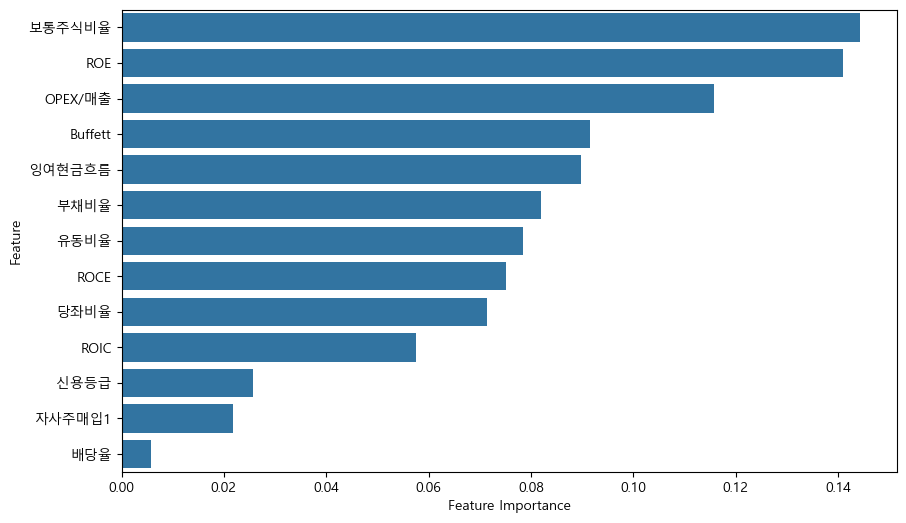

0.04678362573099415


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'


# 예시 데이터 로드

X = x_tr
y = y_tr

# Random Forest 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X, y)

# 변수 중요도 확인
feature_importances = model.feature_importances_

# 중요도를 기준으로 내림차순 정렬
indices = np.argsort(feature_importances)[::-1]

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances[indices], y=X.columns[indices]) ## 정확한 수치는 feature_importances[0]으로 뽑아내기 가능함
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

pred=model.predict(x_test)
print(precision_score(y_test,pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
#내 생각으로는 precision(정밀도)가 정확한 평가방법일거라고 생각. 예상치중 얼마나 잘 맞는가가 중요하므로.

alphas=[0.001,0.01,0.1,1,10]
grid=GridSearchCV
param_grid = {'penalty':['l1','l2','elasticnet'],'C': [0.001, 0.01, 0.1, 1, 10, 100]} #주의. 알파값 역수임. 0.001이면 규제가 쌘거

# Logistic Regression 모델 생성
logR1= LogisticRegression(solver='liblinear')  #l1,l2 동시 사용가능한거 liblinear혼자, 3개 다 가능한건 saga
logR2= LogisticRegression(solver='lbfgs') #그나마 학습값 높게나오는거 요거
logR3= LogisticRegression(solver='saga')

grid = GridSearchCV(logR1, param_grid, cv=5, scoring='precision') #5번 반복이고, 정밀도로 평가
grid2 = GridSearchCV(logR2, param_grid, cv=5, scoring='precision') #5번 반복이고, 정밀도로 평가
grid3 = GridSearchCV(logR3, param_grid, cv=5, scoring='precision') #5번 반복이고, 정밀도로 평가

# 그리드 서치 수행
grid.fit(x_tr, y_tr)
grid2.fit(x_tr, y_tr)
grid3.fit(x_tr, y_tr)

# 최적의 하이퍼파라미터 및 정밀도 출력
print("Best Hyperparameters:", grid.best_params_)
print("Best Precision:", grid.best_score_)

print("Best Hyperparameters:", grid2.best_params_)
print("Best Precision:", grid2.best_score_)

print("Best Hyperparameters:", grid3.best_params_)
print("Best Precision:", grid3.best_score_)


# 최적의 모델 얻기
best_model = grid.best_estimator_
best_model2 = grid2.best_estimator_
best_model3 = grid3.best_estimator_

pred_l1=best_model.predict(x_test)
print(precision_score(y_test,pred_l1))

pred_l2=best_model2.predict(x_test)
print(precision_score(y_test,pred_l2))

pred_l3=best_model3.predict(x_test)
print(precision_score(y_test,pred_l3))


# # 회귀 계수 출력
# coefficients = best_model.coef_
# print("Coefficients:", coefficients)

# coefficients2 = best_model2.coef_
# print("Coefficients:", coefficients2)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Precision: 0.3494901784375469
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Precision: 0.3666666666666667
Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Best Precision: 0.3593514328808446
0.045454545454545456
0.0425531914893617
0.025


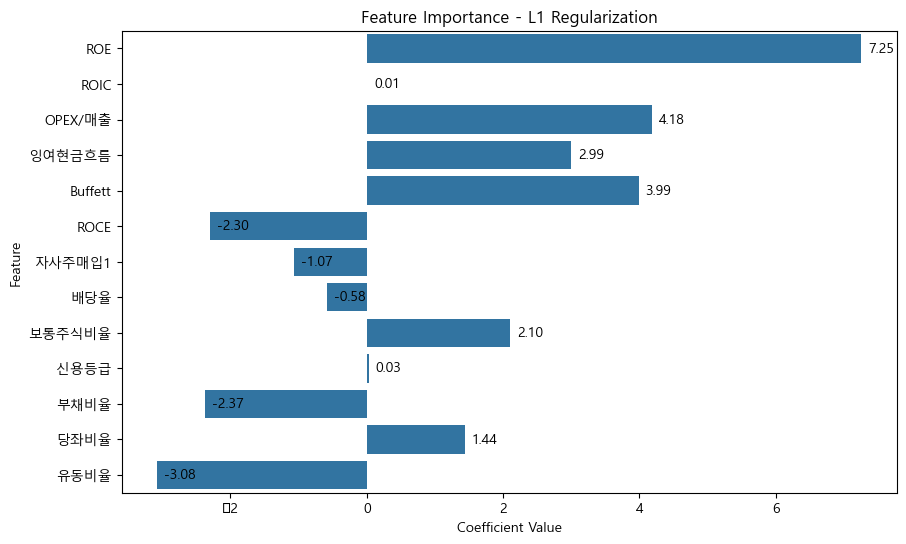

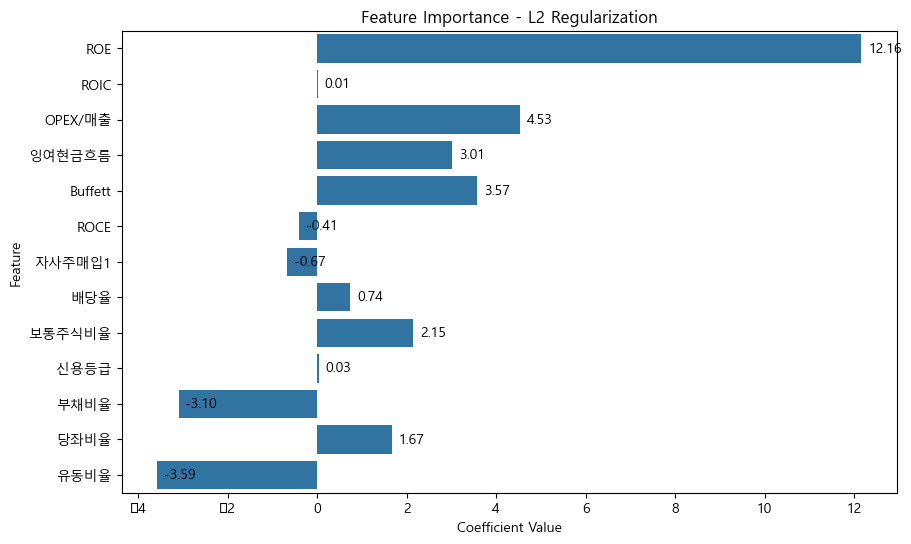

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming x_tr is your feature matrix and best_model is the best logistic regression model
coefficients = best_model.coef_[0]

# Ensure that coefficients is 1-dimensional
coefficients = coefficients.flatten()

# Create a DataFrame for L1 regularization coefficients
l1_param = pd.DataFrame({'Feature': x_tr.columns, 'Coefficient': coefficients})

# Plotting the bar plot for L1 regularization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coefficient', y='Feature', data=l1_param)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance - L1 Regularization")

# 숫자를 막대 위에 표시하는 코드
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

# Assuming x_tr is your feature matrix and best_model2 is the best logistic regression model with L2 regularization
coefficients2 = best_model2.coef_[0]

# Ensure that coefficients2 is 1-dimensional
coefficients2 = coefficients2.flatten()

# Create a DataFrame for L2 regularization coefficients
l2_param = pd.DataFrame({'Feature': x_tr.columns, 'Coefficient2': coefficients2})

# Plotting the bar plot for L2 regularization
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Coefficient2', y='Feature', data=l2_param)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance - L2 Regularization")

# 숫자를 막대 위에 표시하는 코드
for p in ax2.patches:
    ax2.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()